Epoch 1/10
625/625 [==============================] - 30s 44ms/step - loss: 1.6019 - accuracy: 0.4146 - val_loss: 1.4151 - val_accuracy: 0.4881
Epoch 2/10
625/625 [==============================] - 33s 53ms/step - loss: 1.2603 - accuracy: 0.5509 - val_loss: 1.1632 - val_accuracy: 0.5954
Epoch 3/10
625/625 [==============================] - 33s 54ms/step - loss: 1.1034 - accuracy: 0.6129 - val_loss: 1.0863 - val_accuracy: 0.6207
Epoch 4/10
625/625 [==============================] - 35s 56ms/step - loss: 0.9987 - accuracy: 0.6484 - val_loss: 1.0024 - val_accuracy: 0.6497
Epoch 5/10
625/625 [==============================] - 33s 53ms/step - loss: 0.9239 - accuracy: 0.6752 - val_loss: 0.9694 - val_accuracy: 0.6634
Epoch 6/10
625/625 [==============================] - 32s 51ms/step - loss: 0.8667 - accuracy: 0.6969 - val_loss: 0.9435 - val_accuracy: 0.6692
Epoch 7/10
625/625 [==============================] - 32s 51ms/step - loss: 0.8092 - accuracy: 0.7180 - val_loss: 0.9188 - val_accuracy:

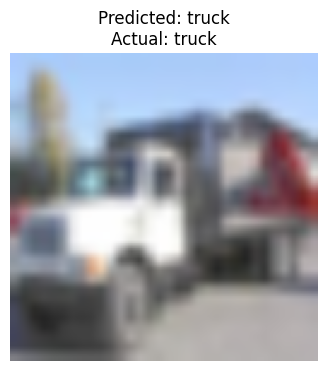

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# User input
index = int(input("Enter an index (0 to 9999) for test image: "))
if index < 0 or index >= len(x_test):
    print("Invalid index. Using index 0 by default.")
    index = 0

# Get test image and prediction
test_image = x_test[index]
true_label = np.argmax(y_test[index])
prediction = model.predict(np.expand_dims(test_image, axis=0), verbose=0)
predicted_label = np.argmax(prediction)

# Show image with prediction
plt.figure(figsize=(4, 4))
resized_image = tf.image.resize(test_image, [128, 128]).numpy()
plt.imshow(resized_image)
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[true_label]}")
plt.show()
